In [4]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
train_ds="/content/train"
test_ds="/content/test"
validation_ds="/content/valid"

In [7]:
os.listdir("/content/train")

['ALPINE CHOUGH',
 'ABBOTTS BOOBY',
 'AFRICAN EMERALD CUCKOO',
 'ALTAMIRA YELLOWTHROAT',
 'ABBOTTS BABBLER',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN GOLDFINCH',
 'ALBERTS TOWHEE',
 'AFRICAN PYGMY GOOSE',
 'AMERICAN FLAMINGO',
 'AFRICAN FIREFINCH',
 'AMERICAN BITTERN',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN OYSTER CATCHER',
 'AMERICAN KESTREL',
 'AMERICAN COOT',
 'AFRICAN CROWNED CRANE',
 'AFRICAN PIED HORNBILL',
 'AMERICAN AVOCET']

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator



valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [9]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [10]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [11]:
img= train_generator[0]
print(img)

(array([[[[161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         ...,
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ]],

        [[161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         ...,
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ]],

        [[161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         [161.       , 162.       , 157.       ],
         ...,
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ],
         [ 31.       ,  32.       ,  26.       ]],

        ...,

        [[134.93164  , 123.98291  , 1

In [12]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [13]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [14]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
13
14


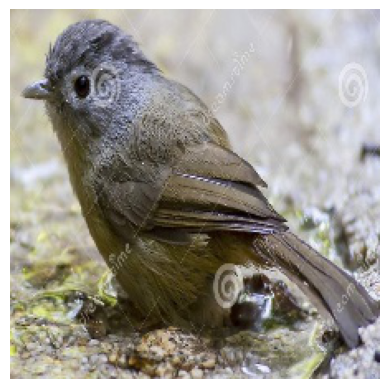

In [15]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/train/ABBOTTS BABBLER/001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

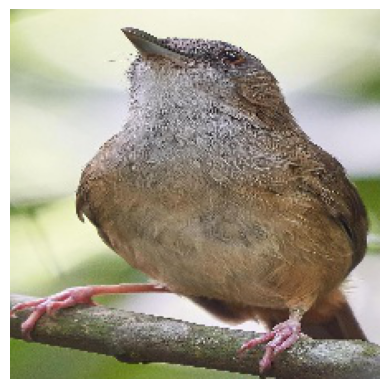

In [16]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/train/ABBOTTS BABBLER/006.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D


In [18]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(20, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [19]:
model = VGG19((224, 224, 3))

In [20]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [21]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [26]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=45)

101/101 [==============================] - 58s 569ms/step - loss: 2.2612 - accuracy: 0.2774 - val_loss: 1.9293 - val_accuracy: 0.4300
Epoch 7/45
101/101 [==============================] - 60s 596ms/step - loss: 2.1233 - accuracy: 0.3279 - val_loss: 1.7913 - val_accuracy: 0.4500
Epoch 8/45
101/101 [==============================] - 57s 562ms/step - loss: 2.0781 - accuracy: 0.3376 - val_loss: 1.6898 - val_accuracy: 0.4900
Epoch 9/45
101/101 [==============================] - 58s 571ms/step - loss: 1.9183 - accuracy: 0.3897 - val_loss: 1.5582 - val_accuracy: 0.5100
Epoch 10/45
 50/101 [=============>................] - ETA: 29s - loss: 1.8641 - accuracy: 0.4074

KeyboardInterrupt: ignored

In [23]:
n_categories = len(os.listdir('/content/train'))# number of categories print(n_categories)

In [24]:
n_categories

20

In [27]:
results =pd.DataFrame(history.history)
results.head(2)

NameError: ignored

In [28]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

NameError: ignored

<Figure size 1500x600 with 0 Axes>

In [29]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 162ms/step


In [33]:
results =model.evaluate(test_generator)

4/4 [==============================] - 1s 114ms/step - loss: 1.4134 - accuracy: 0.5400


1/1 [==============================] - 2s 2s/step


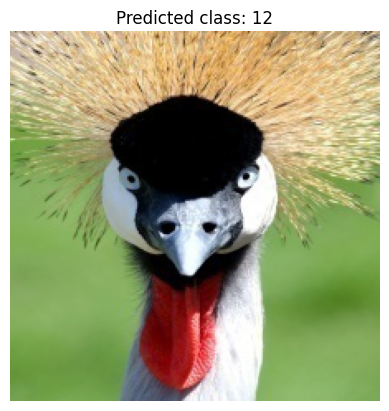

In [31]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/images to predict'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()
